In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
import missingno as msno
wr.filterwarnings('ignore')

In [8]:
df = pd.read_csv("CVIOGData_Feb12.csv")

In [9]:
df.shape

(159, 26)

The data frame contains 159 rows; one for each county in GA.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 26 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   GEOID                                         159 non-null    int64  
 1   NAME                                          159 non-null    object 
 2   MedHouseIncome                                159 non-null    int64  
 3   percent_owner_occupied_cost_burdened          159 non-null    float64
 4   percent_renter_occupied_cost_burdened         159 non-null    float64
 5   Pct_CostBurdened_15_24                        159 non-null    float64
 6   Pct_CostBurdened_25_34                        159 non-null    float64
 7   Pct_CostBurdened_35_64                        159 non-null    float64
 8   Pct_CostBurdened_65_plus                      159 non-null    float64
 9   Pct_RenterCostBurdened_15_24                  159 non-null    flo

In [13]:
df.describe()

,GEOID,MedHouseIncome,percent_owner_occupied_cost_burdened,percent_renter_occupied_cost_burdened,Pct_CostBurdened_15_24,Pct_CostBurdened_25_34,Pct_CostBurdened_35_64,Pct_CostBurdened_65_plus,Pct_RenterCostBurdened_15_24,Pct_RenterCostBurdened_25_34,...,Pct_CostBurdened_Asian_Homeowners,Pct_CostBurdened_Pacific_Islander_Homeowners,Pct_CostBurdened_White_Renters,Pct_CostBurdened_Black_Renters,Pct_CostBurdened_Native_Renters,Pct_CostBurdened_Asian_Renters,Pct_CostBurdened_Pacific_Islander_Renters,isUrban,unemployment_rate,percent_bachelors_higher
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,...,122.000000,30.000000,159.000000,155.000000,69.000000,85.000000,27.000000,159.000000,159.000000,159.000000
mean,13161.490566,60487.553459,19.566904,38.601049,27.308304,18.940549,17.433095,22.460476,37.590344,37.274930,...,24.998895,16.352867,31.532784,42.569808,38.410317,42.018710,41.866767,0.257862,5.323657,20.848522
std,93.281856,17330.069810,4.161512,9.529630,29.237169,11.359647,5.615535,6.032410,25.067443,16.295861,...,31.140675,35.385540,9.889039,17.718517,39.346674,38.044533,44.833167,0.438840,2.730443,9.935246
min,13001.000000,25425.000000,8.463612,11.055276,0.000000,0.000000,2.616148,8.113208,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.054339,7.817243
25%,13082.000000,49716.000000,16.846497,32.220957,0.000000,11.718502,13.871135,18.703318,17.232238,24.850381,...,0.000000,0.000000,25.122549,32.624253,0.000000,0.000000,0.000000,0.000000,3.865649,13.654167
50%,13161.000000,55714.000000,19.233474,39.222942,21.666667,19.024390,17.257319,22.123894,40.000000,38.072289,...,15.637499,0.000000,31.760436,43.197279,28.767123,35.320687,25.000000,0.000000,5.007825,18.149275
75%,13242.000000,68688.000000,21.628260,45.837130,43.026364,25.629973,20.332945,25.212208,56.105901,49.340672,...,31.964286,0.000000,39.159142,52.363696,74.358974,72.000000,100.000000,1.000000,6.107548,24.901833
max,13321.000000,138000.000000,30.978261,57.320872,100.000000,58.394161,39.065817,44.408946,100.000000,81.188119,...,100.000000,100.000000,54.397666,100.000000,100.000000,100.000000,100.000000,1.000000,31.102362,57.995139


In [14]:
variables = df.columns.tolist()

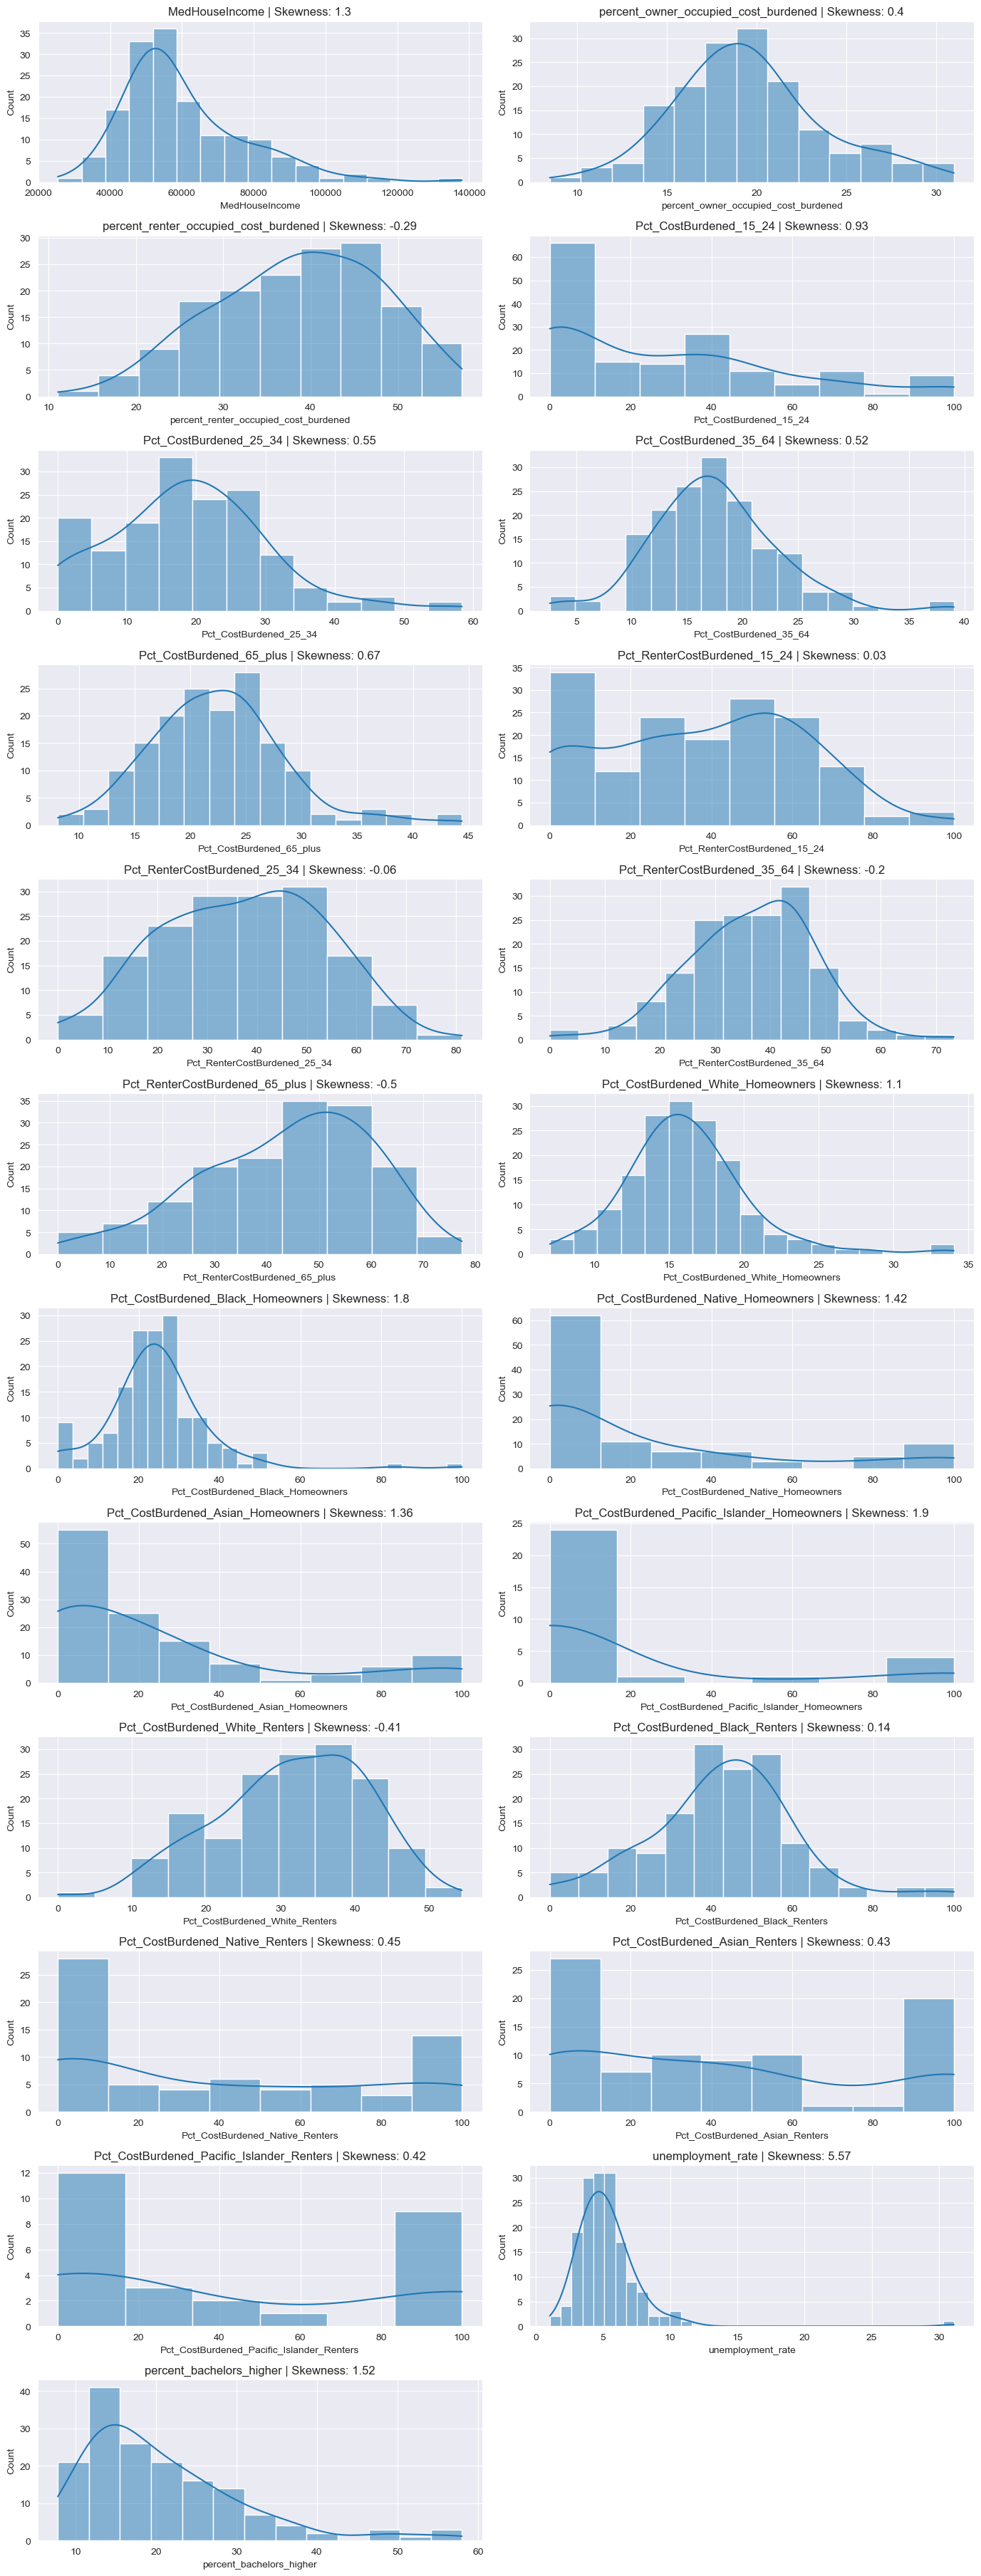

In [15]:
sns.set_style("darkgrid")

exclude_columns = ['GEOID', 'isUrban']
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
numerical_columns = [col for col in numerical_columns if col not in exclude_columns]

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

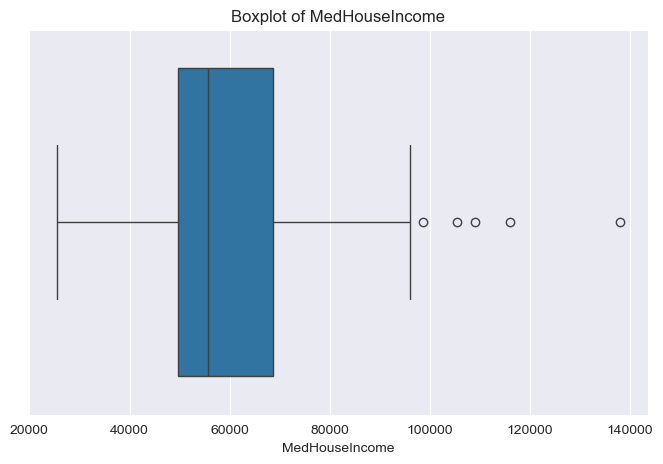

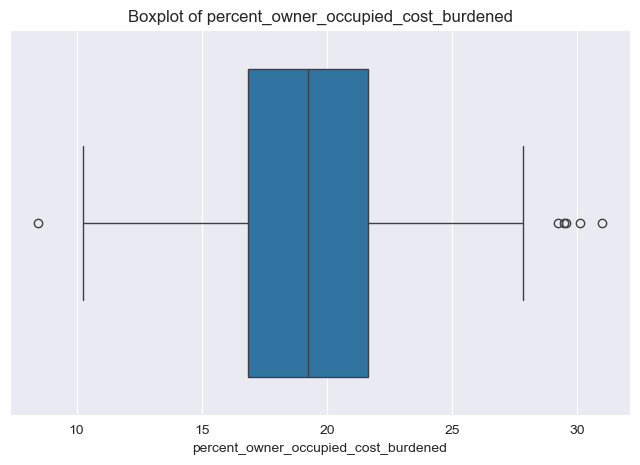

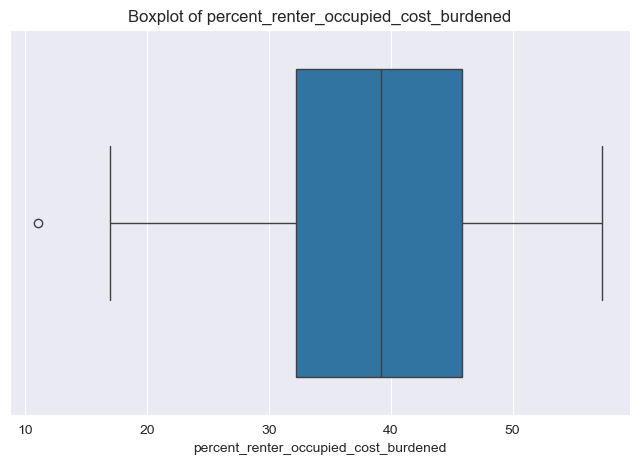

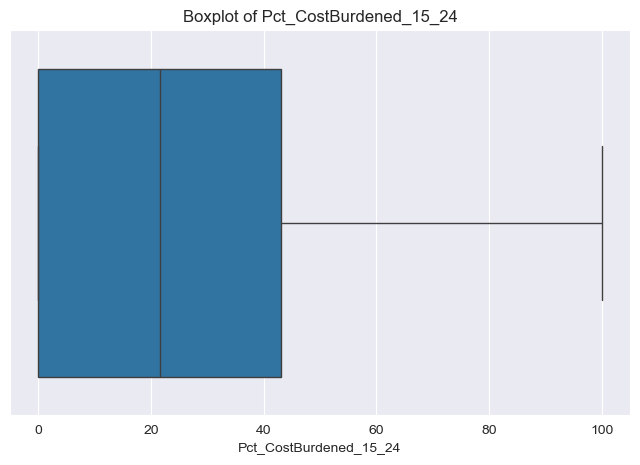

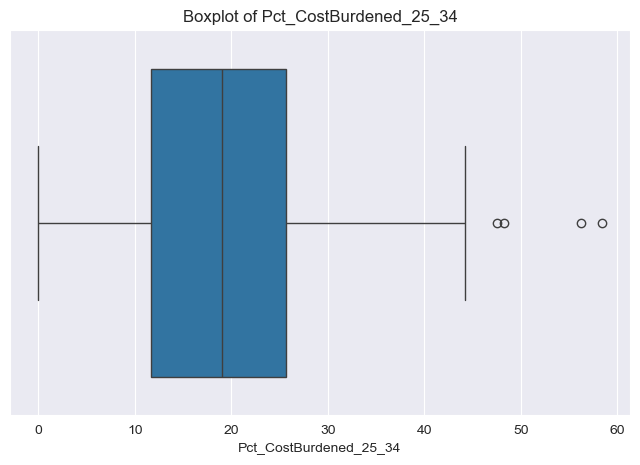

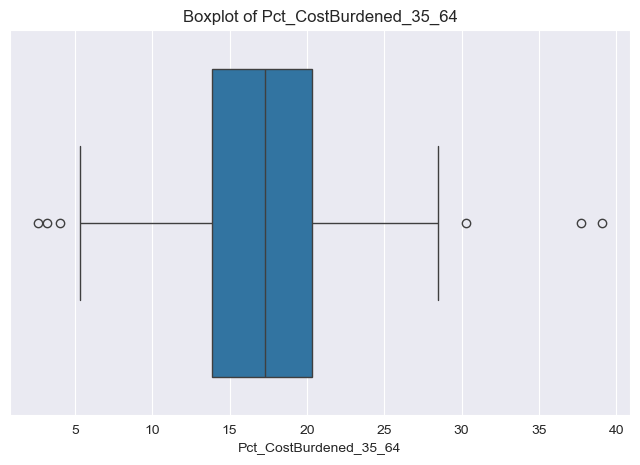

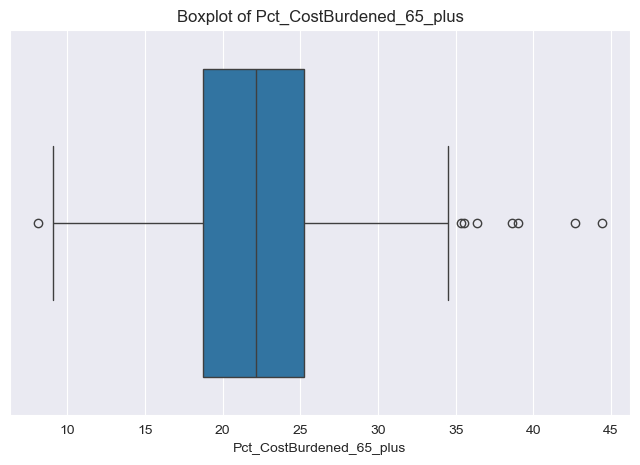

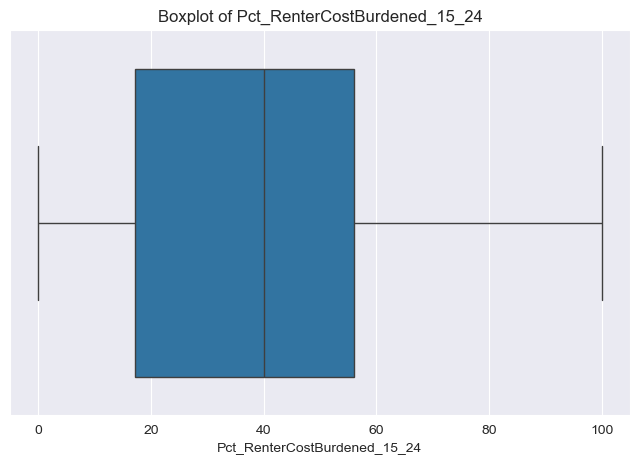

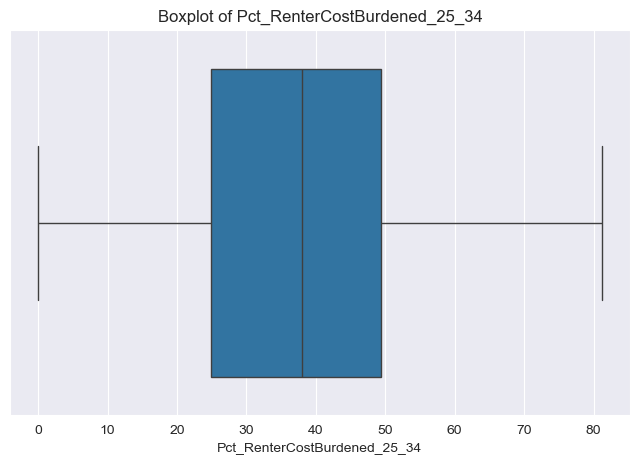

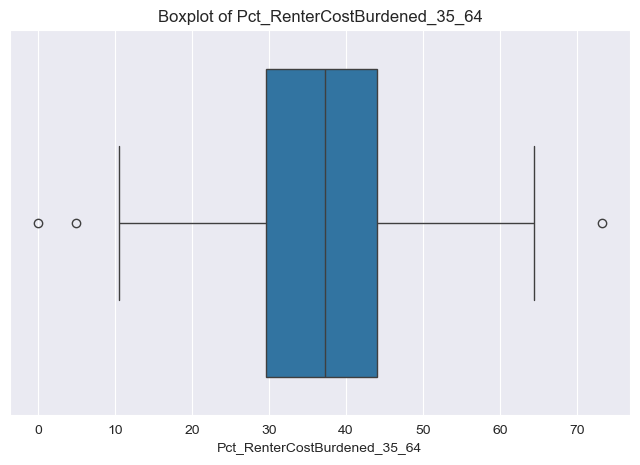

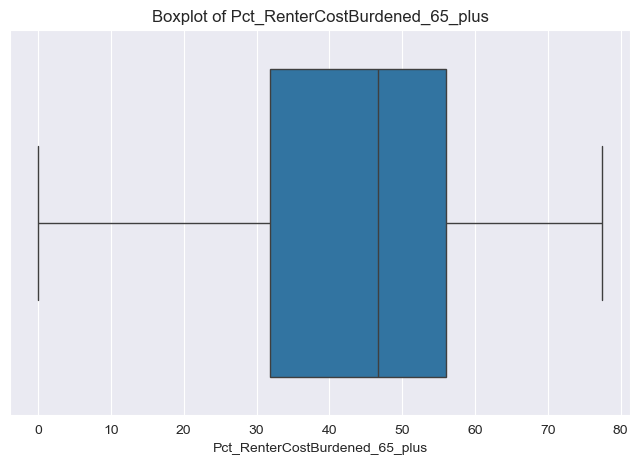

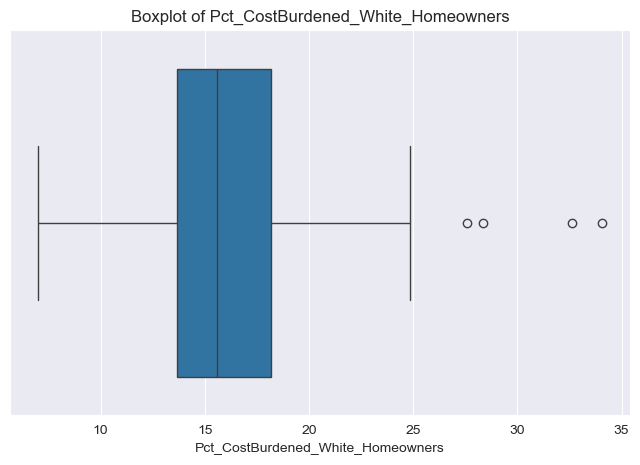

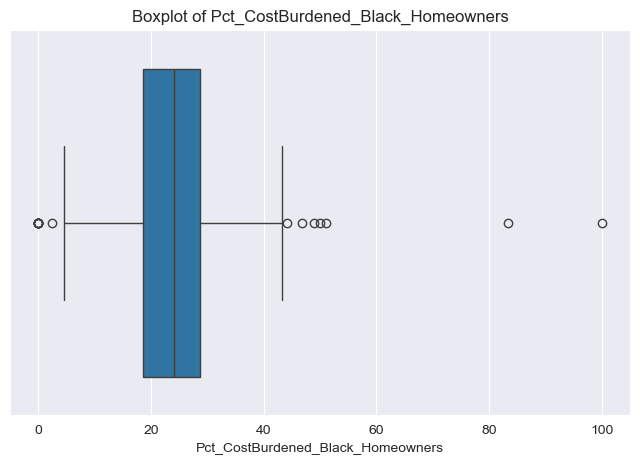

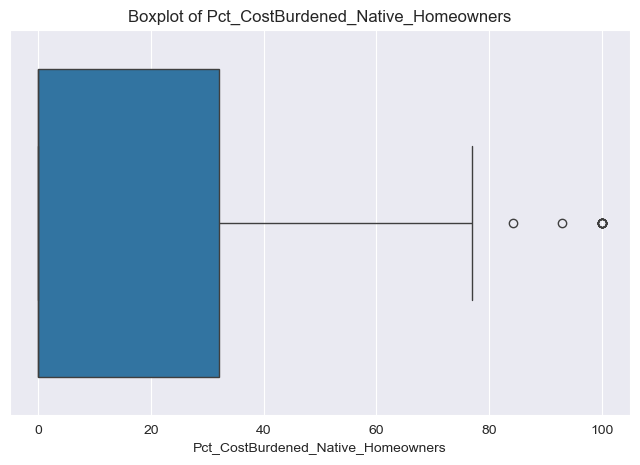

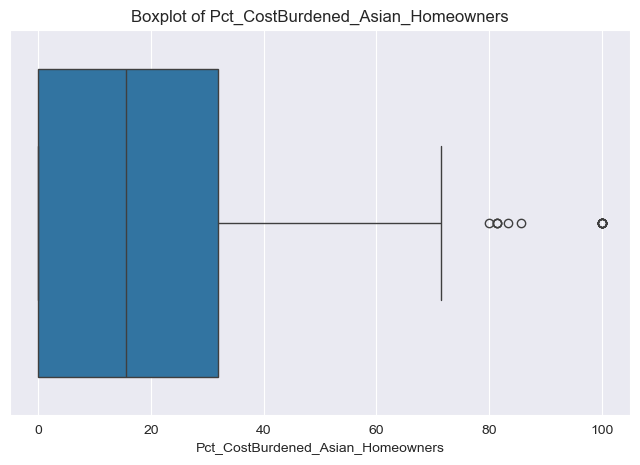

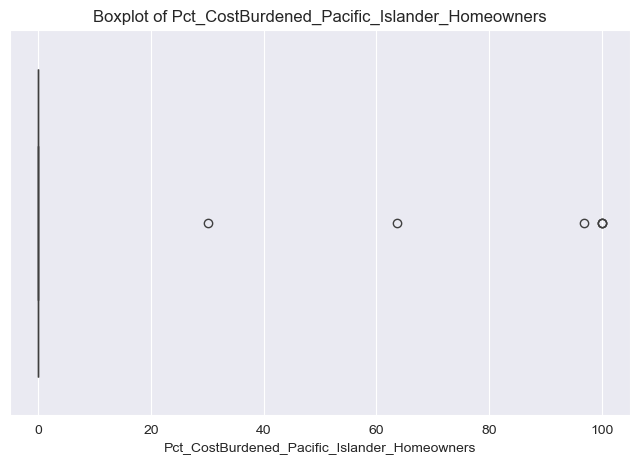

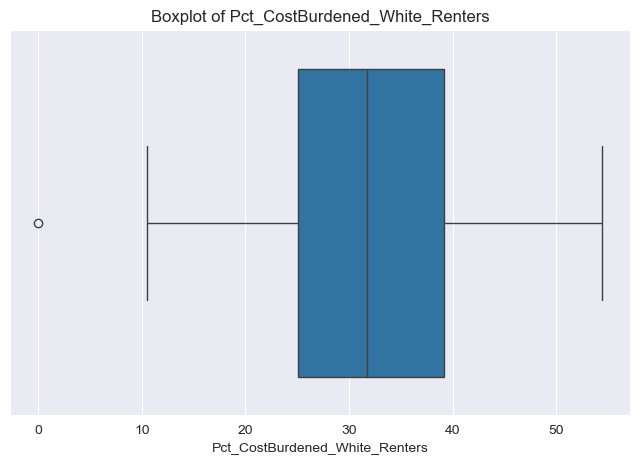

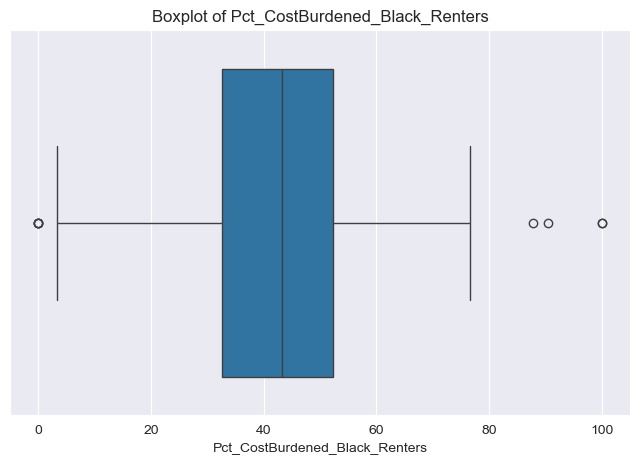

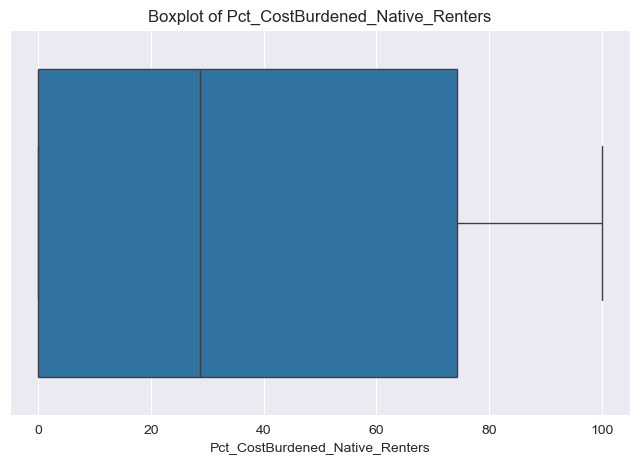

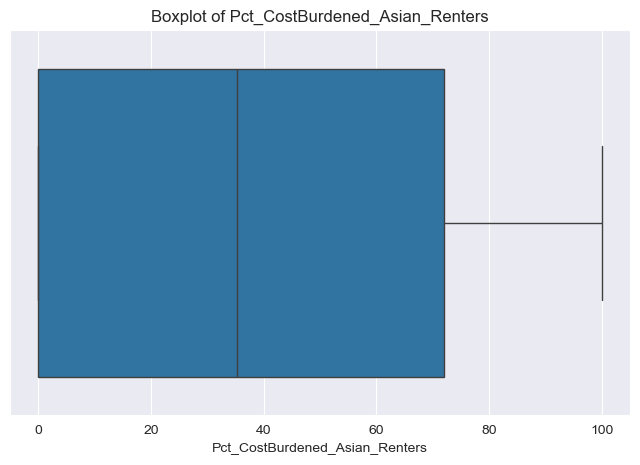

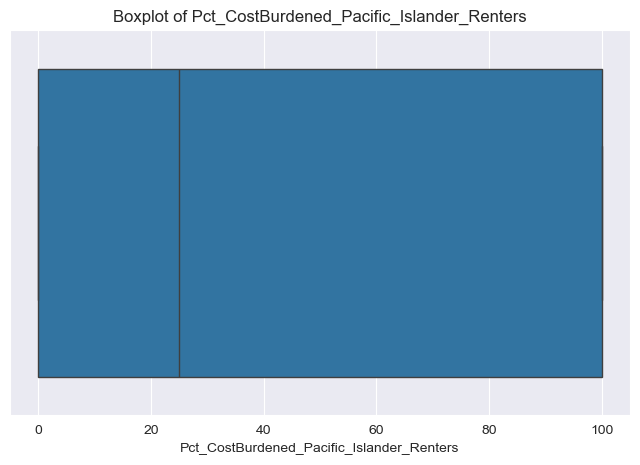

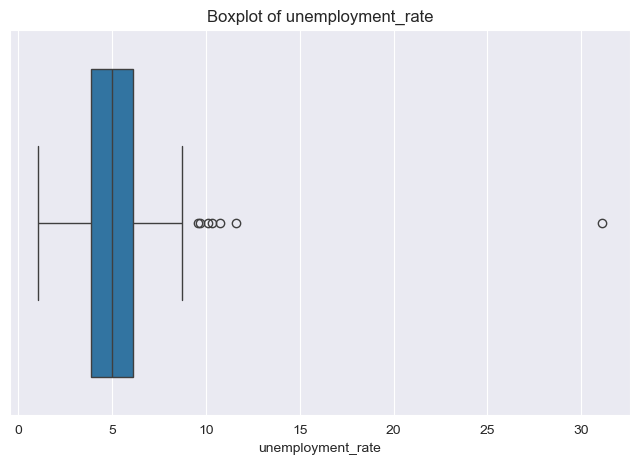

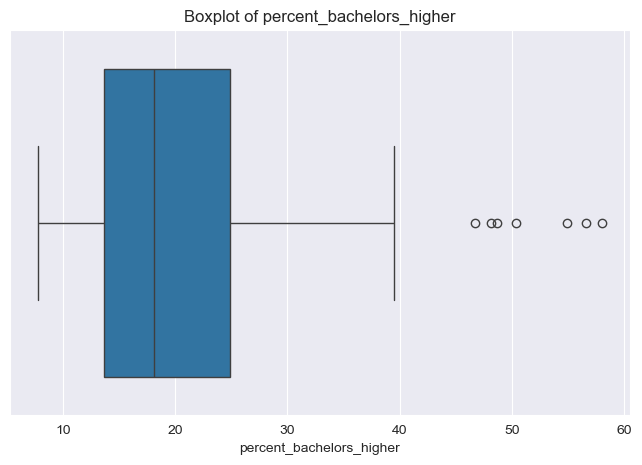

In [16]:
exclude_columns = ['GEOID', 'isUrban']

for column in df.columns:
    if column not in exclude_columns and pd.api.types.is_numeric_dtype(df[column]):  # Only plot numeric columns
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df[column])
        plt.title(f"Boxplot of {column}")
        plt.xlabel(column)
        plt.show()

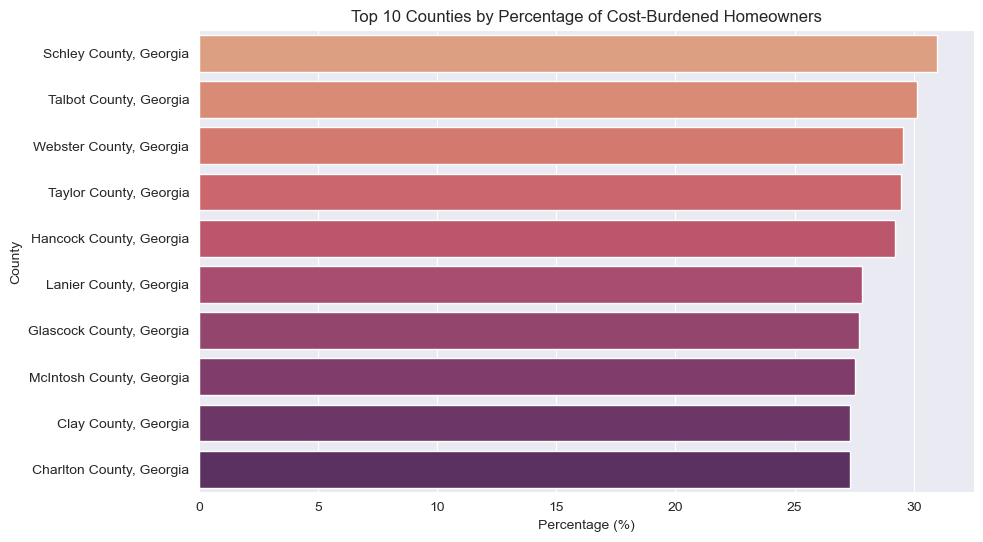

In [17]:
df1 = df.sort_values(by='percent_owner_occupied_cost_burdened', ascending=False)
df_top10 = df1.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='percent_owner_occupied_cost_burdened', y='NAME', data=df_top10, palette='flare')
plt.title('Top 10 Counties by Percentage of Cost-Burdened Homeowners')
plt.xlabel('Percentage (%)')
plt.ylabel('County')
plt.show()

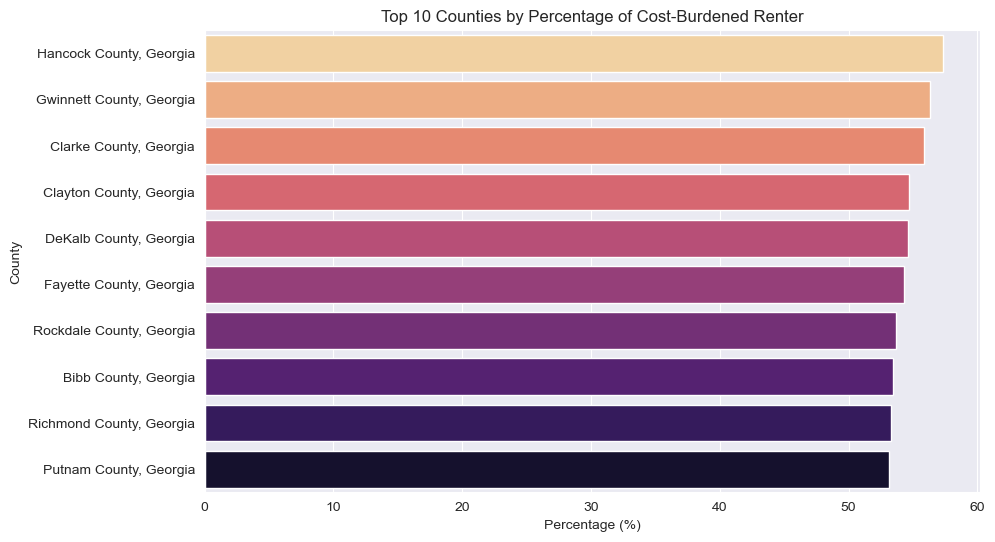

In [18]:
df2 = df.sort_values(by='percent_renter_occupied_cost_burdened', ascending=False)
df_top10 = df2.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='percent_renter_occupied_cost_burdened', y='NAME', data=df_top10, palette='magma_r')
plt.title('Top 10 Counties by Percentage of Cost-Burdened Renter')
plt.xlabel('Percentage (%)')
plt.ylabel('County')
plt.show()

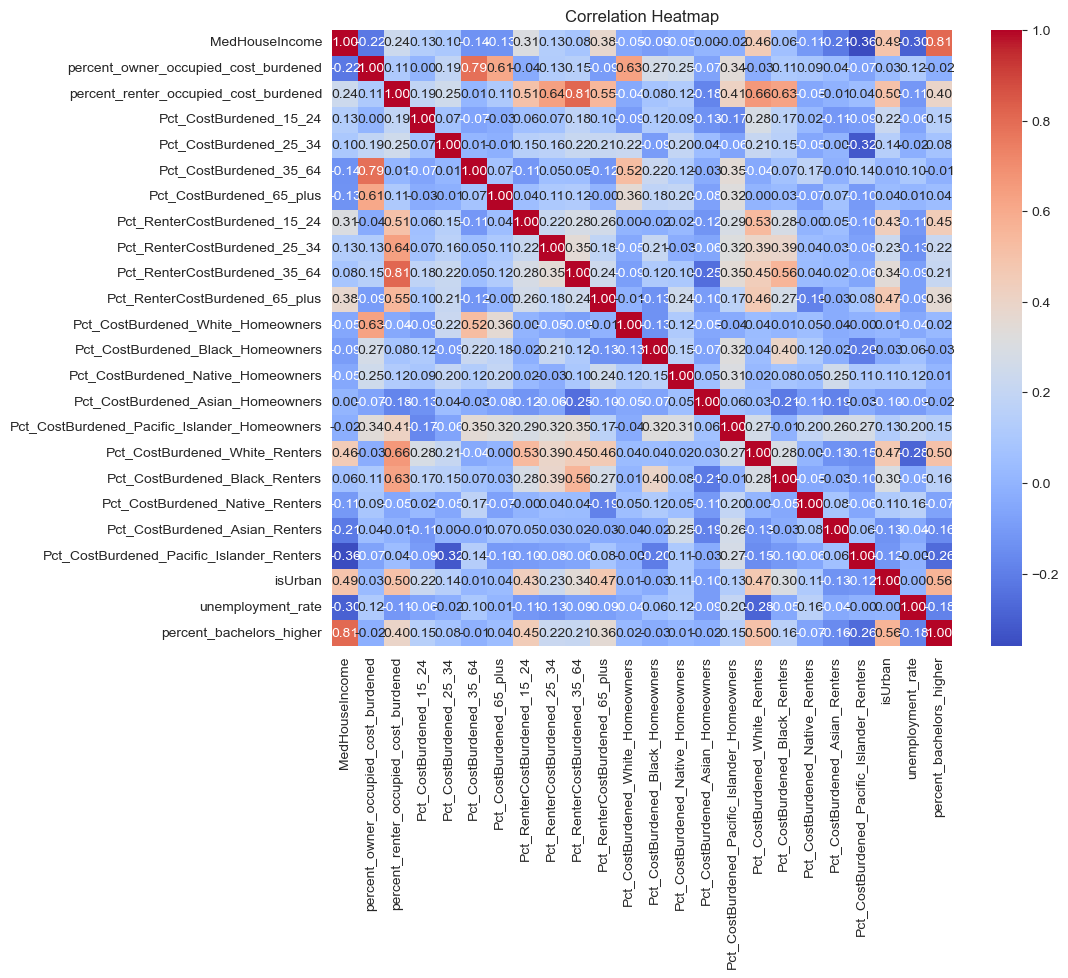

In [19]:
df_num = df.select_dtypes(include=["number"]).drop(columns=['GEOID'], errors='ignore')

correlation_matrix = df_num.corr()

plt.figure(figsize=(10, 8))  # Optional: Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [20]:
threshold = 0.4

strong_correlations = correlation_matrix[
    (correlation_matrix >= threshold) | (correlation_matrix <= -threshold)
]

strong_correlations = strong_correlations.stack().reset_index()

strong_correlations = strong_correlations[
    strong_correlations['level_0'] != strong_correlations['level_1']
]

print(strong_correlations)


                                         level_0  \
1                                 MedHouseIncome   
2                                 MedHouseIncome   
3                                 MedHouseIncome   
5           percent_owner_occupied_cost_burdened   
6           percent_owner_occupied_cost_burdened   
7           percent_owner_occupied_cost_burdened   
9          percent_renter_occupied_cost_burdened   
10         percent_renter_occupied_cost_burdened   
11         percent_renter_occupied_cost_burdened   
12         percent_renter_occupied_cost_burdened   
13         percent_renter_occupied_cost_burdened   
14         percent_renter_occupied_cost_burdened   
15         percent_renter_occupied_cost_burdened   
16         percent_renter_occupied_cost_burdened   
19                        Pct_CostBurdened_35_64   
21                        Pct_CostBurdened_35_64   
22                      Pct_CostBurdened_65_plus   
24                  Pct_RenterCostBurdened_15_24   
26          

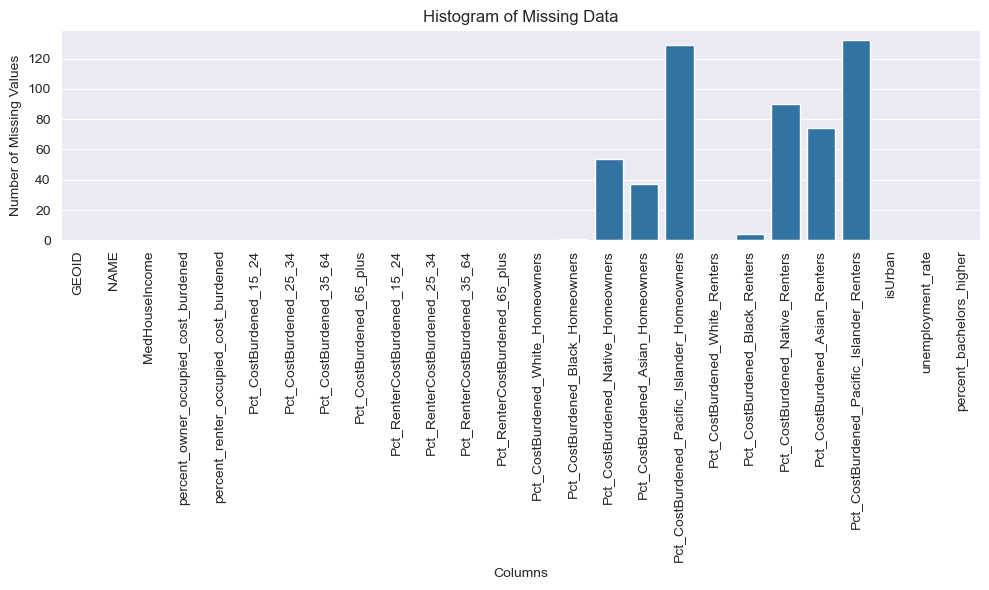

In [21]:
missing_values = df.isnull().sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Histogram of Missing Data")
plt.tight_layout()
plt.show()

In [22]:
df.fillna(0, inplace=True)